In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#Importing require Libraries
import os

import matplotlib.pyplot as plt
import nltk
from tkinter import *
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import scipy

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


In [2]:
# Load compressed models from tensorflow_hub
os.environ["TFHUB_MODEL_LOAD_FORMAT"] = "COMPRESSED"

print("Version: ", tf.__version__)
print("Eager mode: ", tf.executing_eagerly())
print("Hub version: ", hub.__version__)
print("GPU is", "available" if tf.config.experimental.list_physical_devices("GPU") else "NOT AVAILABLE")

Version:  2.3.1
Eager mode:  True
Hub version:  0.9.0
GPU is NOT AVAILABLE


1. # Load IMDb movie review dataset.
Use the tf.keras.datasets IMDb module to load the data. See TensorFlow Core 2.0 for reference.

In [18]:
# this cells takes time, please run once
# Split the training set into 60% and 40%, so we'll end up with 15,000 examples
# for training, 10,000 examples for validation and 25,000 examples for testing.
original_train_data, original_validation_data, original_test_data = tfds.load(
    name="imdb_reviews", 
    split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

In [19]:
original_train_data

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

*Explore the data*

In [123]:
train_examples_batch, train_labels_batch = next(iter(original_train_data.batch(25000)))
text  = str(train_examples_batch.numpy())
sementic = train_labels_batch.numpy()

In [5]:
#tokanizing by tensorflow
tf.keras.datasets.imdb.get_word_index(
    path='imdb_word_index.json'
)

1646592/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

**Examine data structure of this dataset**

In [6]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
    path='imdb.npz', num_words=None, skip_top=0, maxlen=None, seed=113,
    start_char=1, oov_char=2, index_from=3
)

17465344/17464789 [==============================] - 0s 0us/step


In [7]:
(train_data, train_labels), (test_data, test_labels) = (x_train, y_train), (x_test, y_test)

In [8]:
print('train_data shape:', train_data.shape)
print('train_labels shape:', train_labels.shape)
print('a train_data sample:', train_data[0])
print('a train_label sample:', train_labels[0])

train_data shape: (25000,)
train_labels shape: (25000,)
a train_data sample: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 

In [50]:
print('test_data shape:', test_data.shape)
print('test_labels shape:', test_labels.shape)
print('a test_data sample:', test_data[0])
print('a test_label sample:', test_labels[0])

test_data shape: (25000,)
test_labels shape: (25000,)
a test_data sample: [1, 591, 202, 14, 31, 6, 717, 10, 10, 18142, 10698, 5, 4, 360, 7, 4, 177, 5760, 394, 354, 4, 123, 9, 1035, 1035, 1035, 10, 10, 13, 92, 124, 89, 488, 7944, 100, 28, 1668, 14, 31, 23, 27, 7479, 29, 220, 468, 8, 124, 14, 286, 170, 8, 157, 46, 5, 27, 239, 16, 179, 15387, 38, 32, 25, 7944, 451, 202, 14, 6, 717]
a test_label sample: 0


1. *Identify positive reviews in the dataset*
2. *determine positions of positive and negative reviews*
3. *Determine the index for each review type*

Identify the positive review and negetive review 

In [160]:
# Positive movie review
positive_review_location = np.where(train_labels > 0)[0]
positive_review_location

array([    0,     3,     6, ..., 24994, 24995, 24998])

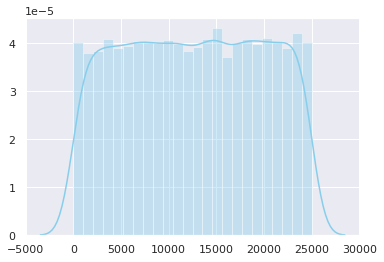

In [87]:
%matplotlib inline
# seaborn distribution for positive review
# Method 1: on the same Axis

sns.distplot( positive_review_location , color="skyblue", label="Sepal Length")
# plt.figure(figsize=(6,8))
# plt.legend()
plt.show()

In [72]:
# Negetive movie review
negetive_review_location = np.where(train_labels < 1)
negetive_review_location

(array([    1,     2,     4, ..., 24996, 24997, 24999]),)

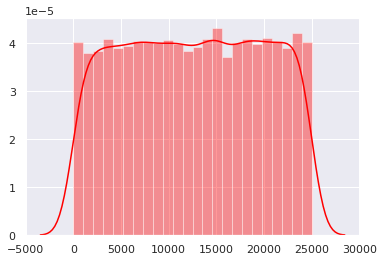

In [89]:
# seaborn plot fr negetive review
sns.distplot( negetive_review_location , color="red", label="Sepal Width")
plt.show()